# Setting things up

In [1]:
from general import *
from exp1 import *
import time
import pandas as pd
import multiprocessing as mp

random_state=42
np.random.seed(random_state)
cpu=mp.cpu_count() 
cpu

8

In [2]:
####
alpha=.05 #Significance level
iterations=100 #MC simulations to calculate type-1 error and power
p=20 #Z dim
m=400 #Training set size
n=100 #Test set size
B=100 #Number of permutations/samplings (RESIT,CRT,CPT)
npar = 7 #Number of different values for parameters like gamma, theta, c etc.
nbas = 30 #Number of different generative configurations (different pairs (a,b))

####
bas = [[np.random.normal(0, 1, p).reshape(p,1), np.random.normal(0, 1, p).reshape(p,1)] for j in range(nbas)]
cs = np.linspace(0,.5,npar)
skews = [0]
losses = ['mae']

In [3]:
results = {'set':[], 
           'ba':[], 'c':[], 'theta':[], 'skew':[], 'gamma':[], 'loss':[],
           'stfr':[], 'resit':[], 'gcm':[], 'crt':[], 'cpt':[],'rbpt':[], 'rbpt2':[]}

# Experiments

## Set 1

In [4]:
theta=0

In [5]:
count=0

for ba in tqdm(bas):
    # Track progress
    pd.DataFrame({'count_set1':[count]}).to_csv('progress.csv')
    
    # Parameters a and b
    b = ba[0]
    a = ba[1]
            
    for skew in skews:
        for loss in losses:
              
            #### Type I error ####
            c = 0
            gammas = np.linspace(0,.04,npar)
            for gamma in gammas:
        
                # Estimating Type I error
                pool = mp.Pool(cpu)
                out = pool.starmap(set1, [(it, theta, gamma, c, a, b, skew, m, n, p, loss, alpha, B) for it in range(iterations)])
                pool.close()
                out = np.array(out).mean(axis=0)
                
                # Storing results
                results['set'].append('set1_type1')
                results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['gamma'].append(gamma); results['loss'].append(loss) 
                results['stfr'].append(out[0]); results['resit'].append(out[1]); results['gcm'].append(out[2]); results['crt'].append(999); results['cpt'].append(999); results['rbpt'].append(out[3]); results['rbpt2'].append(out[4])
            
            #### Power ####
            gamma = 0
            for c in cs:
                
                # Estimating Power
                pool = mp.Pool(cpu)
                out = pool.starmap(set1, [(it, theta, gamma, c, a, b, skew, m, n, p, loss, alpha, B) for it in range(iterations)]) 
                pool.close()
                out = np.array(out).mean(axis=0)
                
                # Storing results
                results['set'].append('set1_power')
                results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['gamma'].append(gamma); results['loss'].append(loss) 
                results['stfr'].append(out[0]); results['resit'].append(out[1]); results['gcm'].append(out[2]); results['crt'].append(999); results['cpt'].append(999); results['rbpt'].append(out[3]); results['rbpt2'].append(out[4])
            
    # Update 'count'
    count+=1

100%|██████████| 30/30 [50:52<00:00, 101.76s/it]


## Set 2

In [6]:
gamma = 0

In [7]:
count=0

for ba in tqdm(bas):
    # Track progress
    pd.DataFrame({'count_set2':[count]}).to_csv('progress.csv')
    
    # Parameters a and b
    b = ba[0]
    a = ba[1]
            
    for skew in skews:
        for loss in losses:
              
            #### Type I error ####
            c = 0
            thetas = np.linspace(0,6,npar)
            for theta in thetas:
        
                # Estimating Type I error
                pool = mp.Pool(cpu)
                out = pool.starmap(set2, [(it, theta, gamma, c, a, b, skew, m, n, p, loss, alpha, B) for it in range(iterations)])
                pool.close()
                out = np.array(out).mean(axis=0)
                
                # Storing results
                results['set'].append('set2_type1')
                results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['gamma'].append(gamma); results['loss'].append(loss) 
                results['stfr'].append(999); results['resit'].append(999); results['gcm'].append(999); results['crt'].append(out[0]); results['cpt'].append(out[1]); results['rbpt'].append(out[2]); results['rbpt2'].append(999)
            
            #### Power ####
            theta = 0
            for c in cs:
                
                # Estimating Power
                pool = mp.Pool(cpu)   
                out = pool.starmap(set2, [(it, theta, gamma, c, a, b, skew, m, n, p, loss, alpha, B) for it in range(iterations)]) 
                pool.close()
                out = np.array(out).mean(axis=0)
                
                # Storing results
                results['set'].append('set2_power')
                results['ba'].append(count); results['c'].append(c); results['theta'].append(theta); results['skew'].append(skew); results['gamma'].append(gamma); results['loss'].append(loss) 
                results['stfr'].append(999); results['resit'].append(999); results['gcm'].append(999); results['crt'].append(out[0]); results['cpt'].append(out[1]); results['rbpt'].append(out[2]); results['rbpt2'].append(999)
            
    # Update 'count'
    count+=1

100%|██████████| 30/30 [1:16:36<00:00, 153.21s/it]


## Saving results

In [8]:
results = pd.DataFrame(results)
results.to_csv('results/artificial_data_experiments.csv')

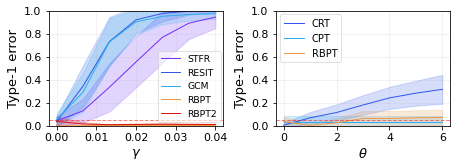

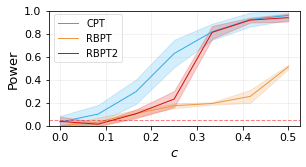

In [9]:
for skew in skews:
    for loss in losses:
        ###
        plt.figure(figsize=(.9*8,1*2))
        plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
        plt.subplot(1, 2, 1)
        plot_type1(results, sett='set1_type1', skew=skew, loss=loss, alpha=alpha, xlabel='$\gamma$', ylabel='Type-1 error', legend=True)
        plt.subplot(1, 2, 2)
        plot_type1(results, sett='set2_type1', skew=skew, loss=loss, alpha=alpha, xlabel='$\\theta$', ylabel='Type-1 error', legend=True)
        plt.savefig('plots/exp1_type1_{:}_{:}.png'.format(str(skew),loss), bbox_inches='tight', dpi=300, transparent=True)
        plt.show()

        ###
        plt.figure(figsize=(.9*5,1*2))
        plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
        plt.subplot(1, 1, 1)
        plot_power(results, skew=skew, loss=loss, alpha=alpha, xlabel='$c$', ylabel='Power', legend=True)
        plt.savefig('plots/exp1_power_{:}_{:}.png'.format(str(skew),loss), bbox_inches='tight', dpi=300, transparent=True)
        plt.show()

In [10]:
cs

array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
       0.41666667, 0.5       ])